In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [55]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('car+evaluation\car.data', names=column_names)

In [56]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [58]:
data_encoded = pd.get_dummies(data, columns=['buying', 'maint','doors', 'persons', 'lug_boot', 'safety'])

In [59]:
y = data_encoded['class']
X = data_encoded.drop('class', axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

In [61]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train = pd.DataFrame(scalar.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), index=X_test.index, columns=X_test.columns)

In [62]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9210019267822736
              precision    recall  f1-score   support

         acc       0.79      0.86      0.82       111
        good       0.83      0.45      0.59        22
       unacc       0.96      0.97      0.97       368
       vgood       1.00      0.89      0.94        18

    accuracy                           0.92       519
   macro avg       0.90      0.79      0.83       519
weighted avg       0.92      0.92      0.92       519



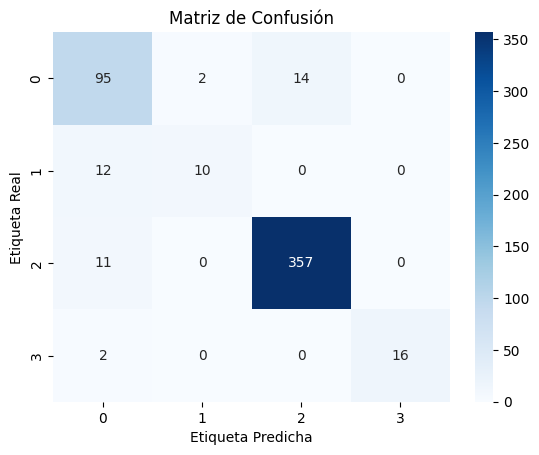

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

In [65]:
lb = LabelBinarizer()

y_test_binary = lb.fit_transform(y_test)

y_probs = logistic_model.predict_proba(X_test)

roc_auc = {}
for i in range(len(y_test_binary[0])):
    roc_auc[i] = roc_auc_score(y_test_binary[:, i], y_probs[:, i])
    
fpr = {}
tpr = {}
for i in range(len(y_test_binary[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_probs[:, i])

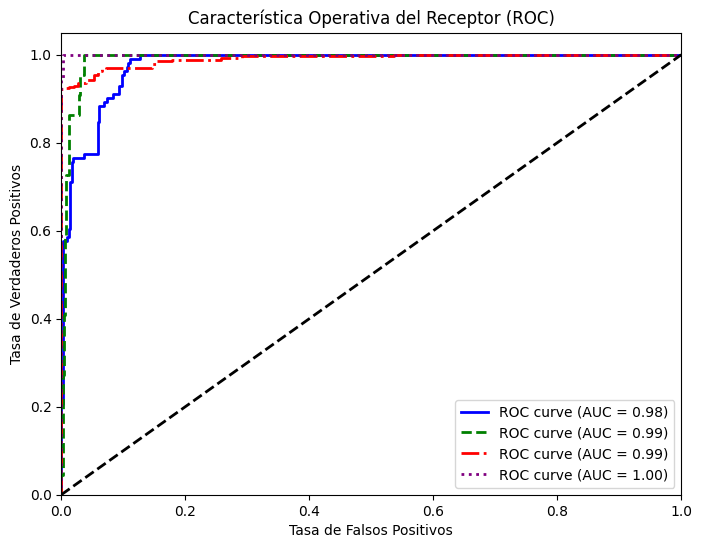

In [66]:
colors = ['blue', 'green', 'red', 'purple']
linestyles = ['-', '--', '-.', ':']

plt.figure(figsize=(8, 6))
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], color=colors[i], linestyle=linestyles[i], lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.show()